In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import time
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

# Load dataset
data = pd.read_csv('/content/wustl-ehms-2020.csv')

data.head(5)

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Attack Category,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496,186,276914.0,92305.0,...,28.9,0,0,0,0,0,0,0.0,normal,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496,186,230984.0,76995.0,...,28.9,0,0,0,0,78,17,0.4,normal,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496,186,218470.0,72823.0,...,28.9,89,104,0,0,78,17,0.4,normal,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496,186,203376.0,67792.0,...,28.9,89,104,0,0,79,17,0.4,normal,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496,186,235723.0,78574.0,...,28.9,89,101,0,0,79,17,0.4,normal,0


In [2]:
data.shape

(16318, 45)

In [3]:
data.dropna(inplace=True)

In [4]:
duplicates = data.duplicated()
data.drop_duplicates(inplace= True)

In [5]:
data.shape

(16318, 45)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dir              16318 non-null  object 
 1   Flgs             16318 non-null  object 
 2   SrcAddr          16318 non-null  object 
 3   DstAddr          16318 non-null  object 
 4   Sport            16318 non-null  object 
 5   Dport            16318 non-null  int64  
 6   SrcBytes         16318 non-null  int64  
 7   DstBytes         16318 non-null  int64  
 8   SrcLoad          16318 non-null  float64
 9   DstLoad          16318 non-null  float64
 10  SrcGap           16318 non-null  int64  
 11  DstGap           16318 non-null  int64  
 12  SIntPkt          16318 non-null  float64
 13  DIntPkt          16318 non-null  float64
 14  SIntPktAct       16318 non-null  float64
 15  DIntPktAct       16318 non-null  int64  
 16  SrcJitter        16318 non-null  float64
 17  DstJitter   

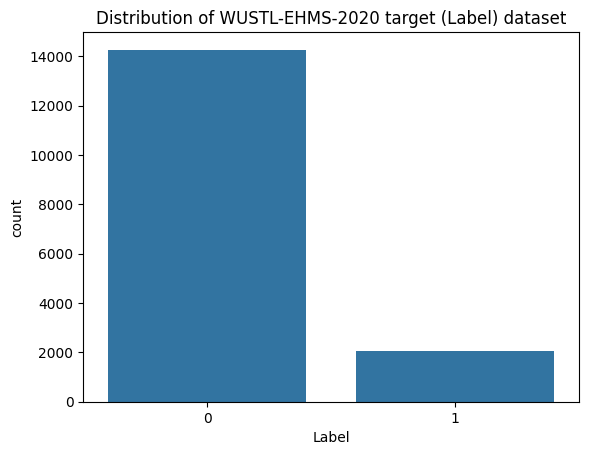

,count
Label,
0,14272
1,2046


In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='Label', data=data)
plt.title('Distribution of WUSTL-EHMS-2020 target (Label) dataset')
plt.show()
data.Label.value_counts()

In [8]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Perform label encoding
data['Attack Category'] = encoder.fit_transform(data['Attack Category'])
data['Dir'] = encoder.fit_transform(data['Dir'])
data['DIntPkt'] = encoder.fit_transform(data['DIntPkt'])

Feature Improtance

In [9]:
# Split features and labels
X = data.drop(['Label', 'Attack Category', 'Dir', 'Flgs', 'DstAddr', 'SrcAddr','SrcMac', 'DstMac', 'Sport',
               'Dport', 'TotBytes', 'dMaxPktSz', 'sMaxPktSz', 'DstGap', 'SrcGap', 'Trans'], axis=1)
y = data['Label']

In [10]:
#use SMOTE for to mitigate data imbalnce
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X, y)

In [11]:
#split dataset into testing and training data using 80/20 ratio
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state = 42)



In [12]:
#use the standard scaler to scale all entries
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)



In [13]:
# Train the RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature importance RFE with RFC

Feature ranking:
1. Feature 'DstJitter': 0.1531
2. Feature 'DIntPkt': 0.1346
3. Feature 'SrcLoad': 0.0725
4. Feature 'Dur': 0.0669
5. Feature 'Load': 0.0631
6. Feature 'Packet_num': 0.0609
7. Feature 'Temp': 0.0603
8. Feature 'SIntPkt': 0.0596
9. Feature 'SrcJitter': 0.0558
10. Feature 'Rate': 0.0548
11. Feature 'DstLoad': 0.0505
12. Feature 'ST': 0.0292
13. Feature 'Resp_Rate': 0.0270
14. Feature 'SYS': 0.0247
15. Feature 'DIA': 0.0234
16. Feature 'Pulse_Rate': 0.0233
17. Feature 'Heart_rate': 0.0211
18. Feature 'SpO2': 0.0167
19. Feature 'SrcBytes': 0.0006
20. Feature 'Loss': 0.0004
21. Feature 'pLoss': 0.0004
22. Feature 'TotPkts': 0.0004
23. Feature 'pSrcLoss': 0.0003
24. Feature 'DstBytes': 0.0002
25. Feature 'pDstLoss': 0.0001
26. Feature 'SIntPktAct': 0.0000
27. Feature 'sMinPktSz': 0.0000
28. Feature 'DIntPktAct': 0.0000
29. Feature 'dMinPktSz': 0.0000


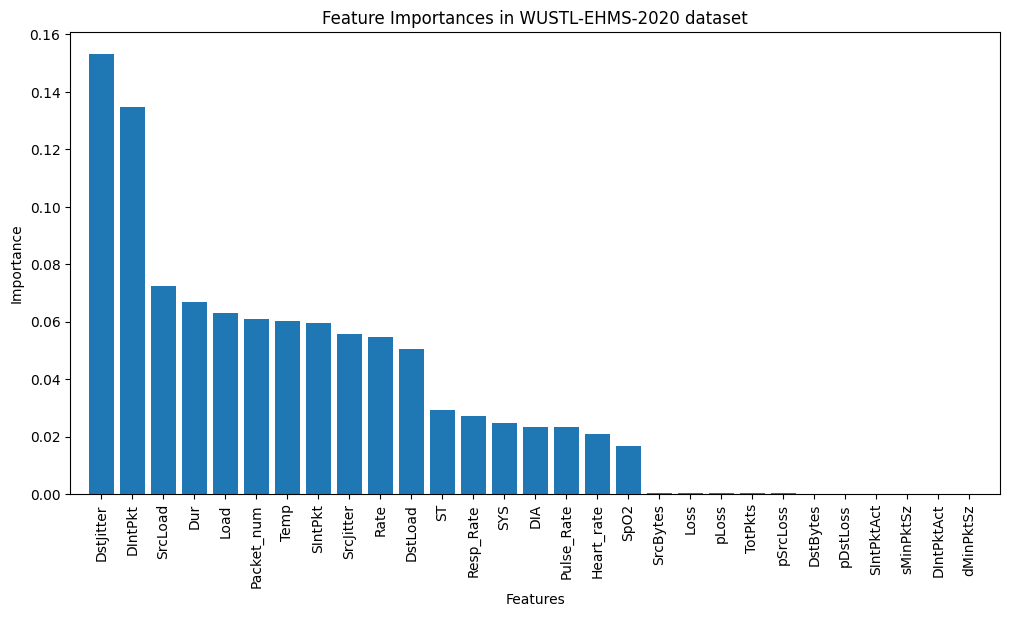

In [14]:
importances = rf_model.feature_importances_

# Sort feature importance and get indices
indices = np.argsort(importances)[::-1]

# Print the feature ranking according to their importance for IDS decisionmaking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{X.columns[indices[f]]}': {importances[indices[f]]:.4f}")

#  Visualize the feature importances of the dataset
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in WUSTL-EHMS-2020 dataset")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [15]:
# Make predictions with the RF classifier
rf_pred = rf_model.predict(X_test)


In [16]:
#declare the performance evaluation metrics for RF
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

In [17]:
# Classification Report for RF
print("Classification Report for random forest (WUSTL-EHMS-2020):")
print(classification_report(y_test, rf_pred))

Classification Report for random forest (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2819
           1       0.95      0.96      0.96      2890

    accuracy                           0.96      5709
   macro avg       0.96      0.96      0.96      5709
weighted avg       0.96      0.96      0.96      5709




ROC AUC Score for Random Forest (WUSTL-EHMS-2020): 0.9565182382031961


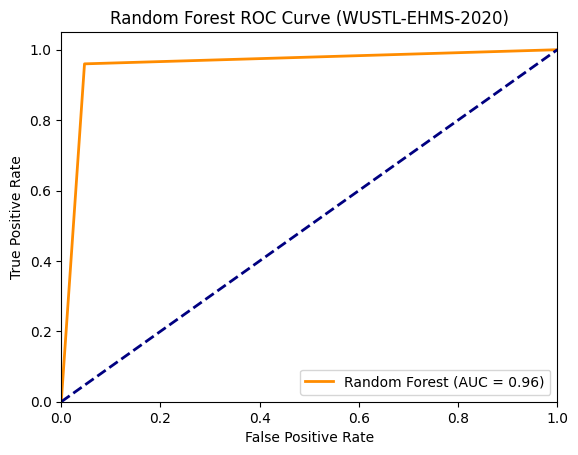

In [18]:
# print ROC AUC Score for RF
roc_auc_rf = roc_auc_score(y_test, rf_pred)
print(f"\nROC AUC Score for Random Forest (WUSTL-EHMS-2020): {roc_auc_rf}")

# Plot ROC Curve for RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Random Forest Classifier (WUSTL-EHMS-2020):
 Accuracy: 0.9565598178314941
 Precision: 0.9545767377838954
 Recall: 0.9598615916955018
 F1 Score: 0.9572118702553486


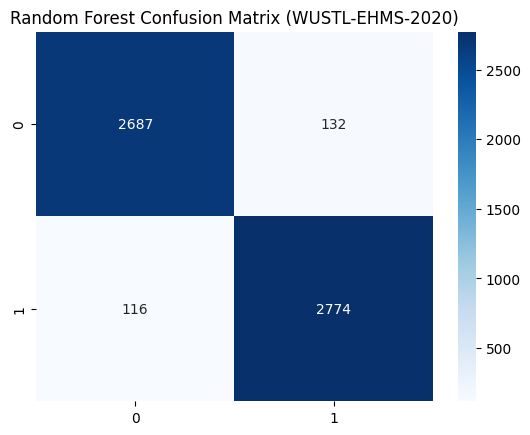

In [19]:
#print performace evaluation and confusion matrix for RF
print(f'Random Forest Classifier (WUSTL-EHMS-2020):\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (WUSTL-EHMS-2020)')
plt.show()

Extreme Gradient Boosting (XGB) Classifier

In [20]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [21]:
# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)


In [22]:
#declare the performance evaluation metrics for XGB
accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

In [23]:
# Classification Report for XGB
print("Classification Report for XGB (WUSTL-EHMS-2020):")
print(classification_report(y_test, xgb_pred))

Classification Report for XGB (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2819
           1       0.97      0.96      0.97      2890

    accuracy                           0.97      5709
   macro avg       0.97      0.97      0.97      5709
weighted avg       0.97      0.97      0.97      5709




ROC AUC Score for Extreme Gradient Boosting (WUSTL-EHMS-2020): 0.9662865429960563


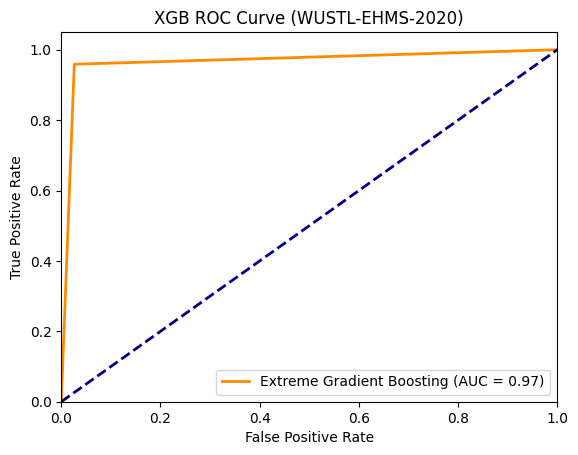

In [24]:
# print ROC AUC Score for XGB
roc_auc_xgb = roc_auc_score(y_test, xgb_pred)
print(f"\nROC AUC Score for Extreme Gradient Boosting (WUSTL-EHMS-2020): {roc_auc_xgb}")

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'Extreme Gradient Boosting (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Extreme Gradient Boosting (WUSTL-EHMS-2020):
 Accuracy: 0.9661937291995095
 Precision: 0.9739894551845343
 Recall: 0.9588235294117647
 F1 Score: 0.9663469921534439


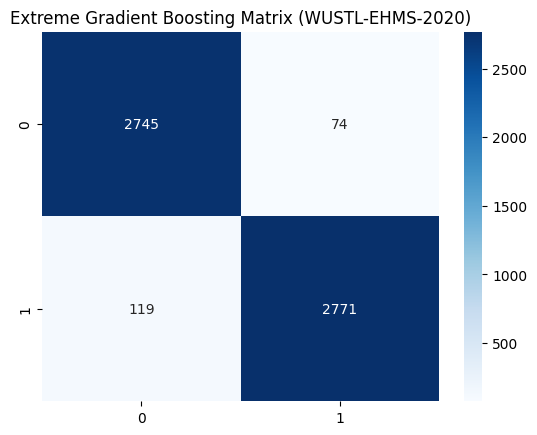

In [25]:
#print confusion matrix and performance evaluation metrics for XGB
print(f'Extreme Gradient Boosting (WUSTL-EHMS-2020):\n Accuracy: {accuracy_xgb}\n Precision: {precision_xgb}\n Recall: {recall_xgb}\n F1 Score: {f1_xgb}')
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Extreme Gradient Boosting Matrix (WUSTL-EHMS-2020)')
plt.show()

Logistic Regression (LR) Classifier

In [26]:
#train the LR model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
#make predictions with the LR model
lr_pred = lr_model.predict(X_test)

In [28]:
#declare performance evaluation metrics for LR
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)
cm_lr = confusion_matrix(y_test, lr_pred)

In [29]:
# Classification Report for LR
print("Classification Report for lr (WUSTL-EHMS-2020):")
print(classification_report(y_test, lr_pred))

Classification Report for lr (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.68      0.82      0.75      2819
           1       0.78      0.63      0.70      2890

    accuracy                           0.72      5709
   macro avg       0.73      0.73      0.72      5709
weighted avg       0.73      0.72      0.72      5709




ROC AUC Score for Logistic Regression (WUSTL-EHMS-2020): 0.7260045219598596


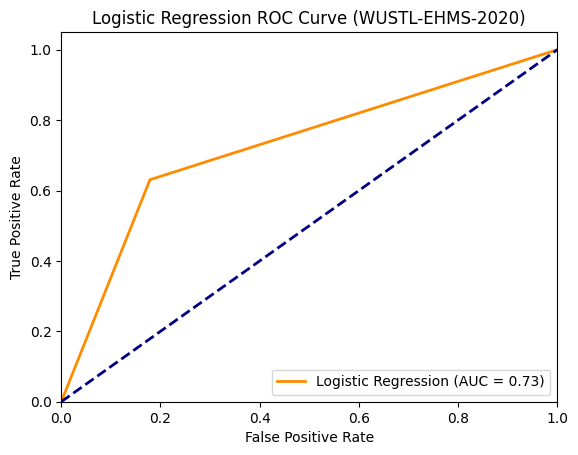

In [30]:
# print ROC AUC Score for LR
roc_auc_lr = roc_auc_score(y_test, lr_pred)
print(f"\nROC AUC Score for Logistic Regression (WUSTL-EHMS-2020): {roc_auc_lr}")

# Plot ROC Curve for LR
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Logistic Regression Classifier (WUSTL-EHMS-2020):
 Accuracy: 0.7248204589245052
 Precision: 0.7834121186076494
 Recall: 0.6307958477508651
 F1 Score: 0.6988690818478053


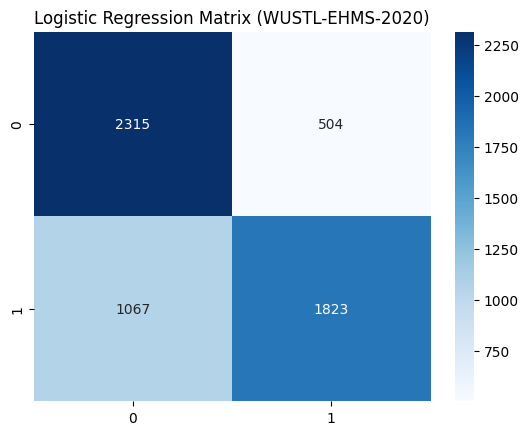

In [31]:
#print performance evaluation metrcs and confusion matrix for LR
print(f'Logistic Regression Classifier (WUSTL-EHMS-2020):\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Matrix (WUSTL-EHMS-2020)')
plt.show()

Support Vector Machine Classifier (SVM)

In [32]:
# train the Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
#predict with svm
svm_pred = svm_model.predict(X_test)

In [34]:
# declare performance evaluation  metrics for svm
accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

In [35]:
# Classification Report for svm
print("Classification Report for svm (WUSTL-EHMS-2020):")
print(classification_report(y_test, svm_pred))

Classification Report for svm (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2819
           1       0.86      0.80      0.83      2890

    accuracy                           0.83      5709
   macro avg       0.83      0.83      0.83      5709
weighted avg       0.83      0.83      0.83      5709




ROC AUC Score for SVM (WUSTL-EHMS-2020): 0.8305153733133175


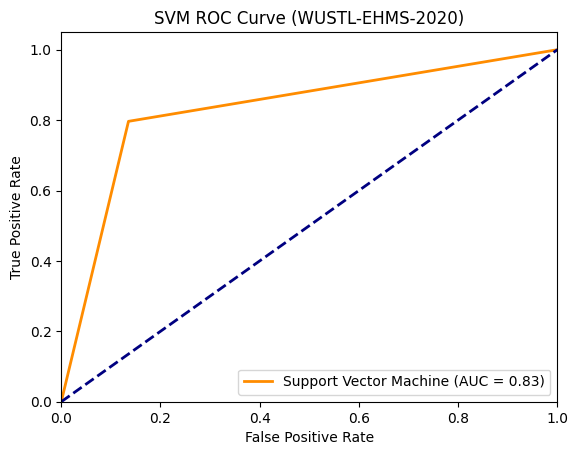

In [36]:
# print ROC AUC Score for svm
roc_auc_svm = roc_auc_score(y_test, svm_pred)
print(f"\nROC AUC Score for SVM (WUSTL-EHMS-2020): {roc_auc_svm}")

# Plot ROC Curve for svm
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Support Vector Machine (WUSTL-EHMS-2020):
 Accuracy: 0.8300928358731827
 Precision: 0.8576751117734724
 Recall: 0.7965397923875432
 F1 Score: 0.8259777538571942


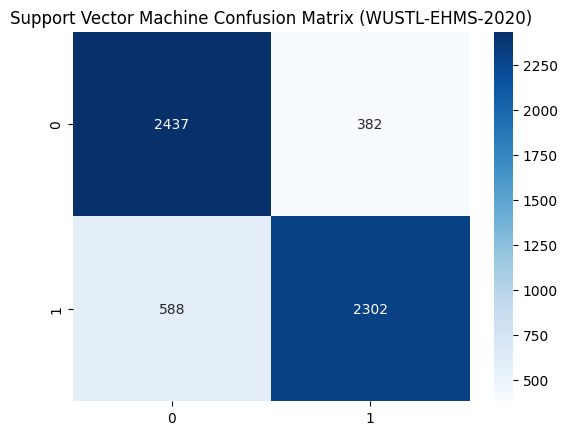

In [37]:
#print confusion matrix and performance evaluation metrics for svm
print(f'Support Vector Machine (WUSTL-EHMS-2020):\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix (WUSTL-EHMS-2020)')
plt.show()

Artificial Neural Network (ANN) CLassifier

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


# Split training data into train and validation sets
X_train_ann, X_val, y_train_ann, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Define the ANN model architecture
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
ann_model.add(Dropout(0.2))  # Optional dropout for regularization
ann_model.add(Dense(units=32, activation='relu'))  # Second hidden layer
ann_model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the ANN model with validation data
history_ann = ann_model.fit(X_train_ann, y_train_ann, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7006 - loss: 0.5402 - val_accuracy: 0.7681 - val_loss: 0.4221
Epoch 2/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7606 - loss: 0.4386 - val_accuracy: 0.7966 - val_loss: 0.3938
Epoch 3/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7853 - loss: 0.4113 - val_accuracy: 0.8137 - val_loss: 0.3742
Epoch 4/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.3895 - val_accuracy: 0.8259 - val_loss: 0.3580
Epoch 5/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.3769 - val_accuracy: 0.8362 - val_loss: 0.3459
Epoch 6/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8253 - loss: 0.3611 - val_accuracy: 0.8474 - val_loss: 0.3311
Epoch 7/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8258 - loss: 0.3564 - val_accuracy: 0.8504 - val_loss: 0.3243
Epoch 8/10
571/571 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.3493 - val_accuracy: 0.

In [40]:
# Make predictions on the test set
ann_pred = (ann_model.predict(X_test) > 0.5).astype("int32")


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
# Classification Report for ANN
print("Classification Report for ANN (WUSTL-EHMS-2020):")
print(classification_report(y_test, ann_pred))

Classification Report for ANN (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2819
           1       0.87      0.87      0.87      2890

    accuracy                           0.87      5709
   macro avg       0.87      0.87      0.87      5709
weighted avg       0.87      0.87      0.87      5709



In [42]:
#declare performance evaluation metrics for ANN
accuracy_ann = accuracy_score(y_test, ann_pred)
precision_ann = precision_score(y_test, ann_pred)
recall_ann = recall_score(y_test, ann_pred)
f1_ann = f1_score(y_test, ann_pred)
cm_ann = confusion_matrix(y_test, ann_pred)

Artificial Neural Network (WUSTL-EHMS-2020):
 Accuracy: 0.8691539674198634
 Precision: 0.8701208981001727
 Recall: 0.8716262975778547
 F1 Score: 0.8708729472774417


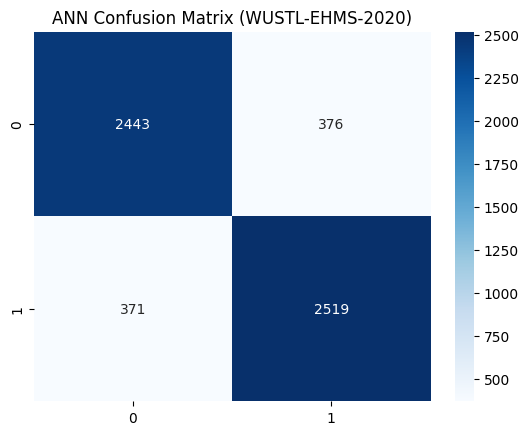

In [43]:
#priint confusion matrix and performance evaluation metrics for ANN
print(f'Artificial Neural Network (WUSTL-EHMS-2020):\n Accuracy: {accuracy_ann}\n Precision: {precision_ann}\n Recall: {recall_ann}\n F1 Score: {f1_ann}')
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix (WUSTL-EHMS-2020)')
plt.show()


ROC AUC Score for ANN (WUSTL-EHMS-2020): 0.869122833074135


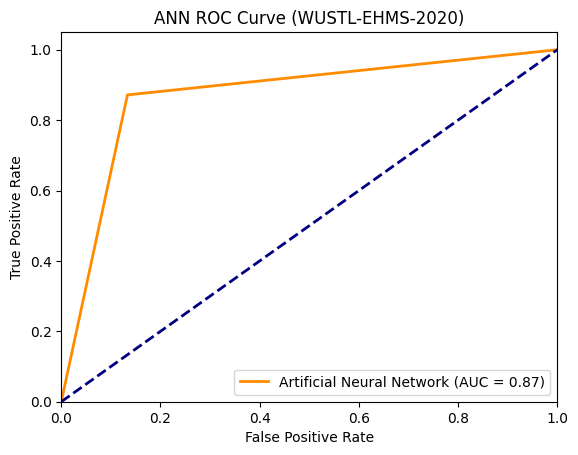

In [44]:
# print ROC AUC Score forANN
roc_auc_ann = roc_auc_score(y_test, ann_pred)
print(f"\nROC AUC Score for ANN (WUSTL-EHMS-2020): {roc_auc_ann}")

# Plot ROC Curve for ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_pred)
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2, label=f'Artificial Neural Network (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Long Short Term Memory (LSTM) Classifier

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

X_train_reshaped = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = np.array(X_val).reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])



# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))) # Use the reshaped input shape
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7077 - loss: 0.5436 - val_accuracy: 0.7664 - val_loss: 0.4144
Epoch 2/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7629 - loss: 0.4212 - val_accuracy: 0.7894 - val_loss: 0.3872
Epoch 3/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7806 - loss: 0.3979 - val_accuracy: 0.8018 - val_loss: 0.3787
Epoch 4/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7937 - loss: 0.3852 - val_accuracy: 0.8097 - val_loss: 0.3657
Epoch 5/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7974 - loss: 0.3805 - val_accuracy: 0.8191 - val_loss: 0.3592
Epoch 6/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8122 - loss: 0.3640 - val_accuracy: 0.8235 - val_loss: 0.3507
Epoch 7/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8178 - loss: 0.3627 - val_accuracy: 0.8312 - val_loss: 0.3415
Epoch 8/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8168 - loss: 0.3601 - val_accuracy: 0.

In [47]:
# Make predictions (use the reshaped test data)
lstm_pred = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [48]:
# Classification Report for LSTM
print("Classification Report for LSTM (WUSTL-EHMS-2020):")
print(classification_report(y_test, lstm_pred))

Classification Report for LSTM (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2819
           1       0.85      0.82      0.84      2890

    accuracy                           0.84      5709
   macro avg       0.84      0.84      0.84      5709
weighted avg       0.84      0.84      0.84      5709



In [49]:
#declareperformance evaluation metrics for LSTM
accuracy_lstm = accuracy_score(y_test, lstm_pred)
precision_lstm = precision_score(y_test, lstm_pred)
recall_lstm = recall_score(y_test, lstm_pred)
f1_lstm = f1_score(y_test, lstm_pred)
cm_lstm = confusion_matrix(y_test, lstm_pred)

LSTM:
 Accuracy (WUSTL-EHMS-2020): 0.8362235067437379
 Precision: 0.8504840444603801
 Recall: 0.8207612456747405
 F1 Score: 0.8353583377355167


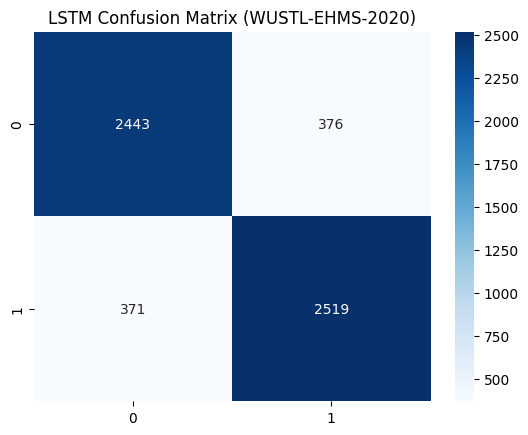

In [50]:
#print performance evaluation metrics and confusion matrix for LSTM
print(f'LSTM:\n Accuracy (WUSTL-EHMS-2020): {accuracy_lstm}\n Precision: {precision_lstm}\n Recall: {recall_lstm}\n F1 Score: {f1_lstm}')
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix (WUSTL-EHMS-2020)')
plt.show()


ROC AUC Score for LSTM (WUSTL-EHMS-2020): 0.8364182248238904


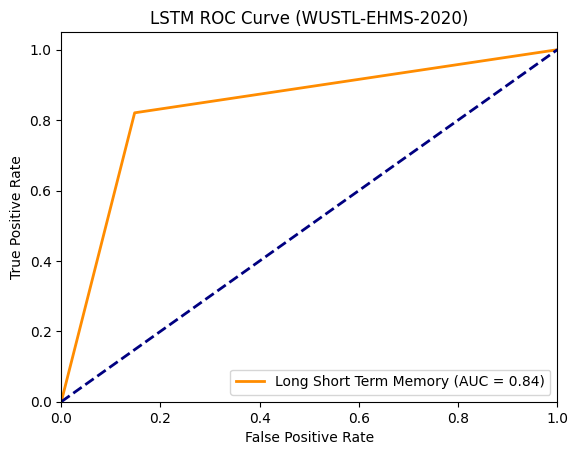

In [51]:
# print ROC AUC Score for LSTM
roc_auc_lstm = roc_auc_score(y_test, lstm_pred)
print(f"\nROC AUC Score for LSTM (WUSTL-EHMS-2020): {roc_auc_lstm}")

# Plot ROC Curve for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_pred)
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2,label=f'Long Short Term Memory (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Ensemble Model

In [52]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define base learners for the ensemble model
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', xgb.XGBClassifier(eval_metric='logloss'))
]


# Define meta-learner for the ensemble model
meta_learner = SVC(probability=True)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  # Cross-validation splitting strategy
)


# Step 5: Train the stacking classifier for the ensemble model
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=N...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=SVC(probability=True))

In [53]:
# Make predictions for the ensemble model
ensemble_pred = stacking_clf.predict(X_test)


In [54]:
# Classification Report for the ensemble model
print("Classification Report (WUSTL-EHMS-2020):")
print(classification_report(y_test, ensemble_pred))

Classification Report (WUSTL-EHMS-2020):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2819
           1       0.98      0.97      0.98      2890

    accuracy                           0.98      5709
   macro avg       0.98      0.98      0.98      5709
weighted avg       0.98      0.98      0.98      5709



In [55]:
#declare performance evaluation variables for the ensemble model
accuracy_ensemble_model = accuracy_score(y_test, ensemble_pred)
precision_ensemble_model = precision_score(y_test, ensemble_pred)
recall_ensemble_model = recall_score(y_test, ensemble_pred)
f1_ensemble_model = f1_score(y_test, ensemble_pred)
cm_ensemble_model = confusion_matrix(y_test, ensemble_pred)


ROC AUC Score for Ensemble Model Classifier (WUSTL-EHMS-2020): 0.9760753463583126


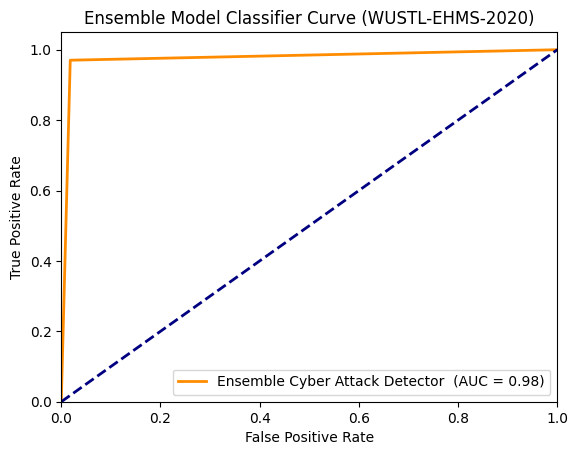

In [56]:
# print ROC AUC Score forthe ensemble model
roc_auc_ensemble = roc_auc_score(y_test, ensemble_pred)
print(f"\nROC AUC Score for Ensemble Model Classifier (WUSTL-EHMS-2020): {roc_auc_ensemble}")

# Plot ROC Curve for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_pred)
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'Ensemble Cyber Attack Detector  (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble Model Classifier Curve (WUSTL-EHMS-2020)')
plt.legend(loc="lower right")
plt.show()


Ensemble_model (WUSTL-EHMS-2020):
 Accuracy: 0.976002802592398
 Precision: 0.9821366024518389
 Recall: 0.970242214532872
 F1 Score: 0.9761531766753698


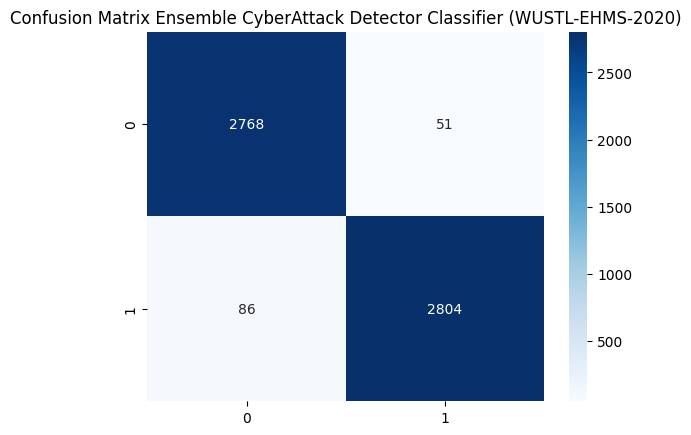

In [57]:
#print confusionmatrix and performance evaluation metrics
print(f'Ensemble_model (WUSTL-EHMS-2020):\n Accuracy: {accuracy_ensemble_model}\n Precision: {precision_ensemble_model}\n Recall: {recall_ensemble_model}\n F1 Score: {f1_ensemble_model}')
sns.heatmap(cm_ensemble_model, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Ensemble CyberAttack Detector Classifier (WUSTL-EHMS-2020)')
plt.show()

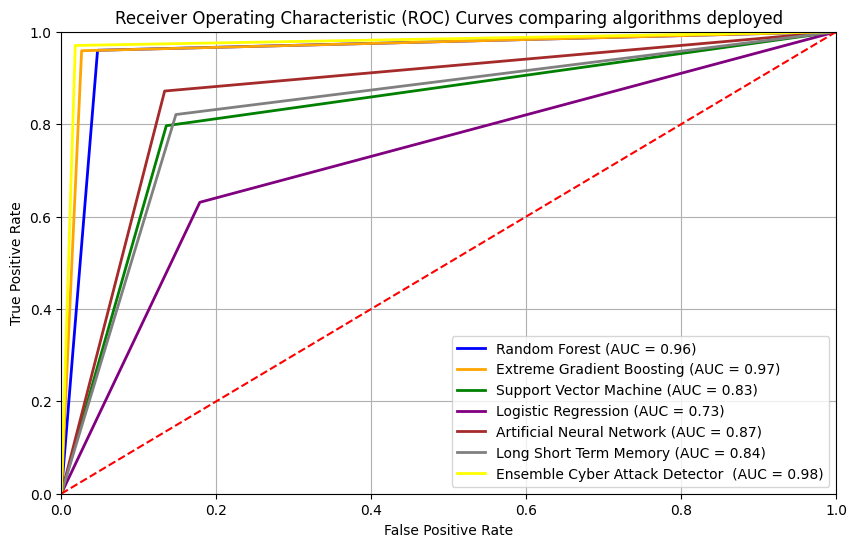

In [58]:

#  Plot ROC curves for all of the models deployed
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'Extreme Gradient Boosting (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, color='purple', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_ann, tpr_ann, color='brown', lw=2, label=f'Artificial Neural Network (AUC = {roc_auc_ann:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='grey', lw=2, label=f'Long Short Term Memory (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_ensemble, tpr_ensemble, color='yellow', lw=2, label=f'Ensemble Cyber Attack Detector  (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves comparing algorithms deployed')
plt.legend(loc='lower right')
plt.grid()
plt.show()